## ABOUT THE DATASET

### Overview about the dataset:
- According to Kaggle: the data-set contains aggregate individual statistics for 67 NBA seasons. from basic box-score attributes such as points, assists, rebounds etc., to more advanced money-ball like features such as Value Over Replacement.
- This NBA dataset contain many information both about the seasons and the players information. The pros of having quite large data at hand is that I can do deep dive data anaylis and found good and well-rounded insights.
- Data is stored in 3 seperate csv file which are player_data, player and seasons_stats

**1. Player data overview** 
- It shows the team and the position each players played throughout the span of 67 seasons
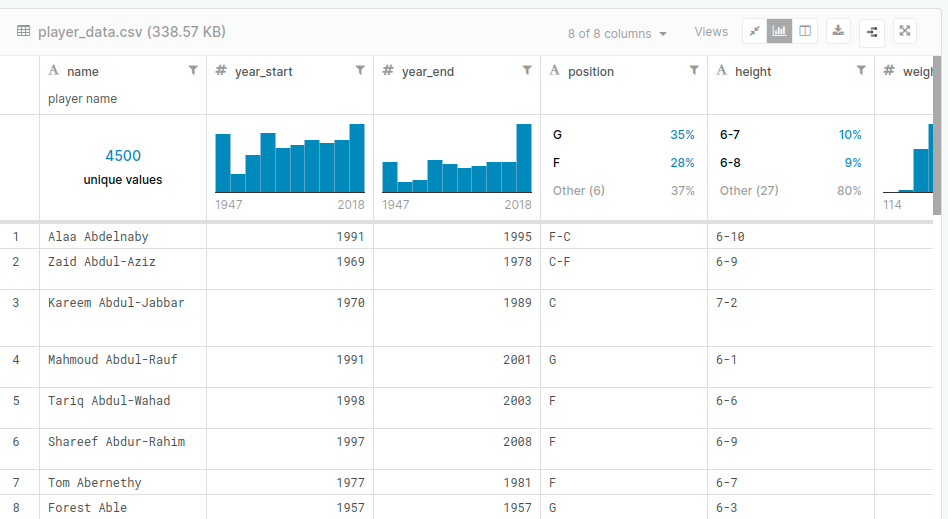

**2. Player overview**
- The data contains some the personal information of each players for example their birth state, birth city.
- It has duplicate information with player data
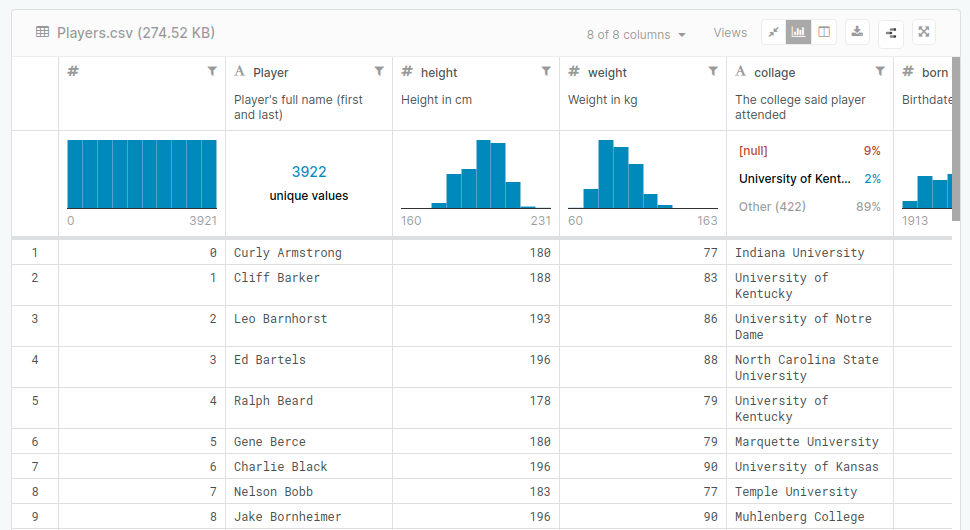

**3. Seasons_stats data**:
- This csv stores the performance of each players in each seasons with various type of metrics.
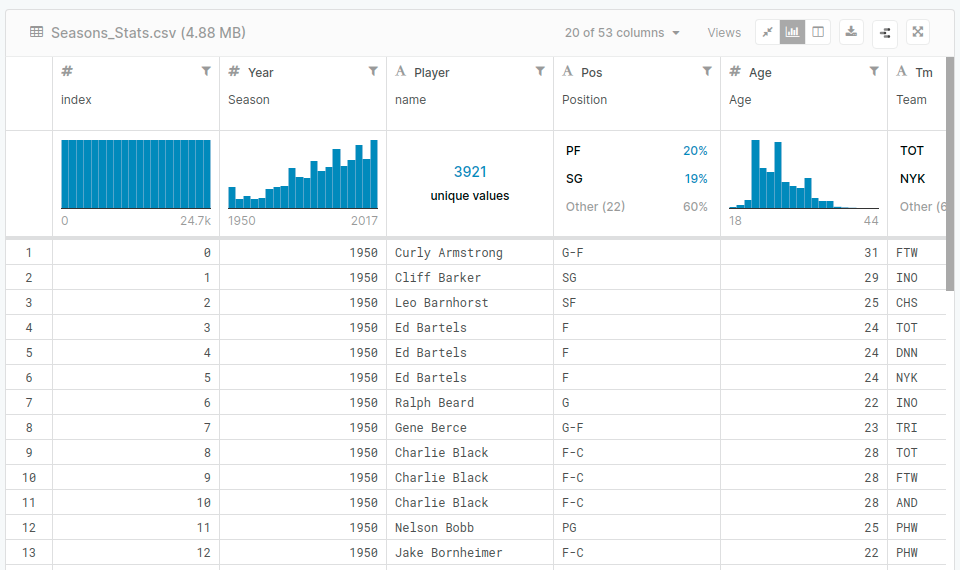

### What are we going to do with the dataset?
**1. The purpose:** Before starting to analyze any dataset, we must know what kind of information and insights that we are looking for. By doing so, we choose imaging that we are data scientists of an NBA talent agency. Our task is to look for and provide useful insights for our agency to hunt and improve the performance of our talents.


**2. The approach**: we will use python code to analyzing the dataset to get the insights. After that, for the purpose of proffessional visualization, we will visualize the dataset on Google data studio.

**3. The final work:** Here is the link to the Google Data Studio: https://datastudio.google.com/reporting/f4cfb10c-9705-425f-8522-c3f5d6f16dd0

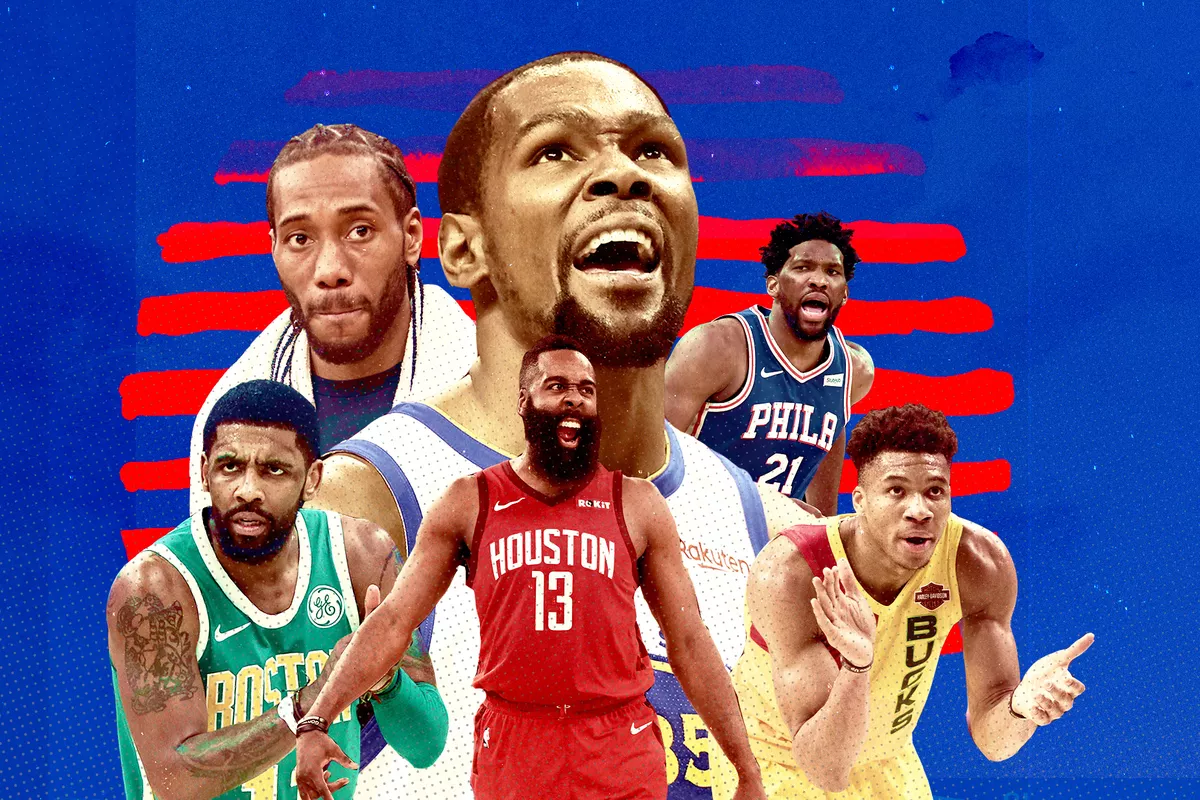

## DATA ANALYSIS

### The first approach
**- In this approach, I take an overview look of all the information provides in the dataset.**

#### Cleaning dataset
- The first thing I'm going to do is to clean the dataset, by removing or add information to NaN rows and columns.

In [1]:
# import libraries to deal with cleaning data and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Set notebook options

pd.set_option('precision',3)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [3]:
# Reading the csv data using pandas

player = pd.read_csv('players.csv')
season = pd.read_csv('seasons.csv')

In [3]:
# Dropping the unecessary and blank columns

season.drop(['GS', 'blanl', 'blank2'], axis=1, inplace=True)
season.drop(season.iloc[:,[0]], axis=1, inplace=True)

In [4]:
# There is some important metrics that the data is not provided, so I did data engineering.

season['PPG'] = season['PTS']/season['G']

In [5]:
# Let's take a look

season.sample()

Year        Player Pos   Age   Tm     G     MP  PER    TS%   3PAr  \
23868  2016.0  Ray McCallum  PG  24.0  MEM  10.0  219.0  7.7  0.425  0.329   

       ...  ORB   DRB   TRB   AST  STL  BLK   TOV    PF   PTS  PPG  
23868  ...  2.0  14.0  16.0  27.0  7.0  3.0  13.0  15.0  69.0  6.9  

[1 rows x 50 columns]

#### Overall change of no team, game. 
**- After cleaning the data, I want to know how much NBA has changed over the course of 67 years.**


In [4]:
# Creating new pandas data to leave the origin data untouch and could be re-used if need, also for the purpose of easier to visualize on Google studio. 

overall_plt = season.groupby('Year').nunique()
overall_plt.drop(overall_plt.loc[:, 'MP':'PTS'].columns, axis=1, inplace=True)
overall_plt.drop(['Age', 'Pos'], axis=1, inplace=True)
season.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [5]:
# Perform some data enginering to get the information that I need.

overall_plt['Players_per_team'] = round (overall_plt['Player'] / overall_plt['Tm'])
index = np.arange(len(overall_plt))

overall_plt.set_index('Year').reset_index()
overall_plt.drop('Year', axis=1, inplace=True)
overall_plt = overall_plt.reset_index()
overall_plt

Year  Unnamed: 0  Player  Tm   G  GS  Players_per_team
0   1950.0         312     223  18  65   0              12.0
1   1951.0         174     135  12  60   0              11.0
2   1952.0         130     116  11  44   0              11.0
3   1953.0         160     124  11  51   0              11.0
4   1954.0         131     110  10  42   0              11.0
..     ...         ...     ...  ..  ..  ..               ...
63  2013.0         573     468  31  82  78              15.0
64  2014.0         611     481  31  83  80              16.0
65  2015.0         651     492  31  83  80              16.0
66  2016.0         578     476  31  82  78              15.0
67  2017.0         595     486  31  82  81              16.0

[68 rows x 7 columns]

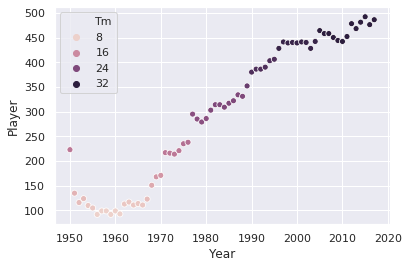

In [10]:
# Change the type of information to interger and save each group of data into difference files for the purpose of later use on Google Studio

overall_year = overall_plt['Year'].values.astype(int)
overall_player = overall_plt['Player'].values.astype(int)
overall_team = overall_plt['Tm'].index.astype(int)
overall_game = overall_plt['G'].values.astype(int)
overall_ppt = overall_plt['Players_per_team'].values.astype(int)

sns.scatterplot( x= 'Year', y= 'Player', hue='Tm', data=overall_plt)

In [9]:
# Saving the new csv files

overall_plt.to_csv('Change in term of no player, team, games')

Text(0.5, 1.0, 'Change of no over time')

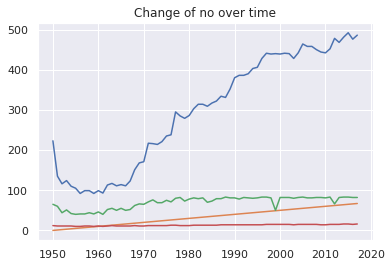

In [11]:
# the number of players is increasing much more than the increasing of team, games)

plt.plot(overall_year, overall_player)
plt.plot(overall_year, overall_team)
plt.plot(overall_year, overall_game)
plt.plot(overall_year, overall_ppt)
plt.title('Change of no over time')



**Quick conclusion so far:**
1. The number of NBA players has grown 119.63 %, from 219 in 1950 to 481 in 2017.
2. The average number of players compete in NBA regular season is 294.82
3. The least number of players competes in a season is 91 players during 1955-1956 & 1958-1959 season.
4. The most number of players competes in a season is 489 players in 2014-2015 season.

#### Career length
**- Now it's time to dive deeper into what to expect in this proffession.**

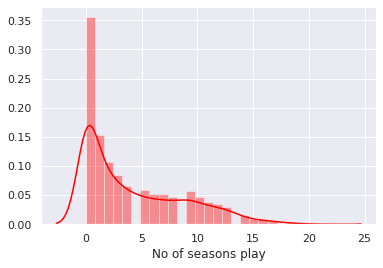

In [14]:
# Due to the lack of the information, let's create one more length columns

length = player['year_end'] - player['year_start']
player['length'] = length
len_max = player['length'].max()
len_count = player['length'].value_counts()
len_y = len_count.values
player.to_csv('career_length')

# Interesting that most of the players could not pass the first 5 years of their career, this one is a tough career path.

sns.distplot(length, color= 'red', axlabel = 'No of seasons play', label = 'Distribution chart')

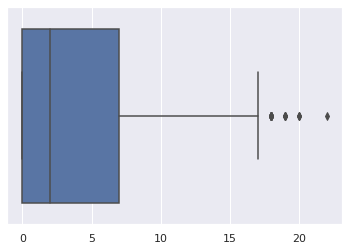

In [15]:
# Let's look at the data under the boxplot so we can understand the quartile and the range of outliers

sns.boxplot(length)

In [14]:
# Let's see who were the outliers interm of career length

q1, q3= np.percentile(length,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [15]:
# Cleaning the data for a clear view

outlier = player[player['length'] >= 17].sort_values('length', ascending = False)
# pd.DataFrame(data, index_col = )
outlier = outlier.drop(columns = ['height', 'weight', 'birth_date', 'college'])
# outlier.reset_index().head(10)
outlier.index = np.arange(1, len(outlier) + 1)
outlier.to_csv('Career length outliers')

In [16]:
# Here is our list of outliers

outlier

name  year_start  year_end position  length
1          Kevin Willis        1985      2007      F-C      22
2         Robert Parish        1977      1997        C      20
3          Moses Malone        1975      1995      C-F      20
4         Kevin Garnett        1996      2016      F-C      20
5         Dirk Nowitzki        1999      2018        F      19
6   Kareem Abdul-Jabbar        1970      1989        C      19
7             Bob Cousy        1951      1970        G      19
8           Kobe Bryant        1997      2016      G-F      19
9          Vince Carter        1999      2018      G-F      19
10          Karl Malone        1986      2004        F      18
11          Rick Mahorn        1981      1999      C-F      18
12       Charles Oakley        1986      2004      F-C      18
13     Shaquille O'Neal        1993      2011        C      18
14        John Stockton        1985      2003        G      18
15          Jason Terry        2000      2018        G      18
16           Tim Duncan        1998      2016      F-C      18
17           Jason Kidd        1995      2013        G      18
18            John Long        1979      1997      G-F      18
19          Paul Pierce        1999      2017      F-G      18
20       Michael Jordan        1985      2003      G-F      18
21         Juwan Howard        1995      2013        F      18
22           Grant Hill        1995      2013      F-G      18
23        James Edwards        1978      1996      C-F      18
24          Kurt Thomas        1996      2013        F      17
25     Jerry Stackhouse        1996      2013      G-F      17
26        Danny Schayes        1982      1999      C-F      17
27         Tree Rollins        1978      1995        C      17
28      Rasheed Wallace        1996      2013      F-C      17
29    Clifford Robinson        1990      2007      F-C      17
30        Herb Williams        1982      1999      C-F      17
31        Nazr Mohammed        1999      2016        C      17
32      Hakeem Olajuwon        1985      2002        C      17
33      Jermaine O'Neal        1997      2014      F-C      17
34           Steve Nash        1997      2014        G      17
35      Dikembe Mutombo        1992      2009        C      17
36            Ray Allen        1997      2014        G      17
37        Reggie Miller        1988      2005      G-F      17
38        Eddie Johnson        1982      1999      F-G      17
39         Derek Fisher        1997      2014        G      17
40       Terry Cummings        1983      2000        F      17
41       Jamal Crawford        2001      2018        G      17
42    Metta World Peace        2000      2017        F      17

#### Top efficient scoring
**- After nowing the career length, outliers in term of career length. Now I wonder what makes the differences of players who could stay in the industry for more than 5 years. In order to do that, I will look into the efficiency of each of players and creating the list of best players.**

##### 2017 Top efficiency scoring 
**- 2017 is the latest year with information, so let's see who are on the top right now**

In [17]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 50 columns):
Year      24624 non-null float64
Player    24624 non-null object
Pos       24624 non-null object
Age       24616 non-null float64
Tm        24624 non-null object
G         24624 non-null float64
MP        24138 non-null float64
PER       24101 non-null float64
TS%       24538 non-null float64
3PAr      18839 non-null float64
FTr       24525 non-null float64
ORB%      20792 non-null float64
DRB%      20792 non-null float64
TRB%      21571 non-null float64
AST%      22555 non-null float64
STL%      20792 non-null float64
BLK%      20792 non-null float64
TOV%      19582 non-null float64
USG%      19640 non-null float64
OWS       24585 non-null float64
DWS       24585 non-null float64
WS        24585 non-null float64
WS/48     24101 non-null float64
OBPM      20797 non-null float64
DBPM      20797 non-null float64
BPM       20797 non-null float64
VORP      20797 non-null float64
FG 

In [18]:
# Clean the data and do data engineering

player2017 = season[season['Year']==2017]
player2017 = player2017.sort_values(by=['PTS'], ascending=False)
player2017['PPG'] = player2017['PTS']/player2017['G']
top2017 = player2017.sort_values(by=['PTS'], ascending=False).head(10)
top2017.index = np.arange(1, len(top2017)+1)
top2017.astype({'Year': 'int64', 'Age': 'int64', 'G': 'int64'})

Year              Player Pos  Age   Tm   G      MP   PER    TS%   3PAr  \
1   2017   Russell Westbrook  PG   28  OKC  81  2802.0  30.6  0.554  0.300   
2   2017        James Harden  PG   27  HOU  81  2947.0  27.3  0.613  0.493   
3   2017       Isaiah Thomas  PG   27  BOS  76  2569.0  26.5  0.625  0.439   
4   2017       Anthony Davis   C   23  NOP  75  2708.0  27.5  0.579  0.088   
5   2017  Karl-Anthony Towns   C   21  MIN  82  3030.0  26.0  0.618  0.186   
6   2017      Damian Lillard  PG   26  POR  75  2694.0  24.1  0.586  0.388   
7   2017       DeMar DeRozan  SG   27  TOR  74  2620.0  24.0  0.552  0.080   
8   2017       Stephen Curry  PG   28  GSW  79  2638.0  24.6  0.624  0.547   
9   2017        LeBron James  SF   32  CLE  74  2794.0  27.0  0.619  0.254   
10  2017    DeMarcus Cousins   C   26  TOT  72  2465.0  25.7  0.562  0.254   

    ...    ORB    DRB     TRB    AST    STL    BLK    TOV     PF     PTS  \
1   ...  137.0  727.0   864.0  840.0  133.0   31.0  438.0  190.0  2558.0   
2   ...   95.0  564.0   659.0  906.0  120.0   37.0  464.0  215.0  2356.0   
3   ...   43.0  162.0   205.0  449.0   70.0   13.0  210.0  167.0  2199.0   
4   ...  174.0  712.0   886.0  157.0   94.0  167.0  181.0  168.0  2099.0   
5   ...  296.0  711.0  1007.0  220.0   57.0  103.0  212.0  241.0  2061.0   
6   ...   46.0  322.0   368.0  439.0   68.0   20.0  197.0  152.0  2024.0   
7   ...   70.0  316.0   386.0  290.0   78.0   13.0  180.0  134.0  2020.0   
8   ...   61.0  292.0   353.0  523.0  143.0   17.0  239.0  183.0  1999.0   
9   ...   97.0  543.0   640.0  646.0   92.0   44.0  303.0  134.0  1954.0   
10  ...  153.0  644.0   797.0  332.0  100.0   92.0  269.0  278.0  1942.0   

          PPG  
1   31.580247  
2   29.086420  
3   28.934211  
4   27.986667  
5   25.134146  
6   26.986667  
7   27.297297  
8   25.303797  
9   26.405405  
10  26.972222  

[10 rows x 50 columns]

In [19]:
top2017.to_csv('top2017.csv')

#####  Top all times efficiency scoring 

In [20]:
# Creating a new data table with the data of top scoring all times

max_ = season.groupby('Year')[['PPG']].max()
merge = season.merge(max_, on='PPG')
merge['Year'].value_counts()
for year, values in zip(merge['Year'].value_counts().index, merge['Year'].value_counts().values):
    if values == 2:
        index = merge[merge['Year'] == year].sort_values(by=['PPG']).index[0]
        merge.drop(index, inplace=True)

In [21]:
# Let's save the data and take a quick look

merge.to_csv('Top_scoring_alltime.csv')
merge.head(5)

Year          Player Pos   Age   Tm     G      MP   PER    TS%  3PAr  \
0  1950.0   George Mikan*   C  25.0  MNL  68.0     NaN   NaN  0.487   NaN   
1  1951.0   George Mikan*   C  26.0  MNL  68.0     NaN   NaN  0.509   NaN   
2  1952.0    Paul Arizin*  SF  23.0  PHW  66.0  2939.0  25.5  0.546   NaN   
3  1953.0  Neil Johnston*   C  23.0  PHW  70.0  3166.0  25.9  0.534   NaN   
6  1954.0  Neil Johnston*   C  24.0  PHW  72.0  3296.0  25.6  0.531   NaN   

   ...  ORB  DRB    TRB    AST  STL  BLK  TOV     PF     PTS        PPG  
0  ...  NaN  NaN    NaN  197.0  NaN  NaN  NaN  297.0  1865.0  27.426471  
1  ...  NaN  NaN  958.0  208.0  NaN  NaN  NaN  308.0  1932.0  28.411765  
2  ...  NaN  NaN  745.0  170.0  NaN  NaN  NaN  250.0  1674.0  25.363636  
3  ...  NaN  NaN  976.0  197.0  NaN  NaN  NaN  248.0  1564.0  22.342857  
6  ...  NaN  NaN  797.0  203.0  NaN  NaN  NaN  259.0  1759.0  24.430556  

[5 rows x 50 columns]

In [22]:
# Making sure there is one top player each season.

merge['Player'] = merge['Player']
top_name = []
for c in merge['Player']:
    if c not in top_name:
        top_name.append(c)

In [23]:
season[season['Player'] == 'Michael Jordan*']

top_all_time = {
    'Player': [],
    'Age': [],
    'PPG': []
}
for index, group in season.iterrows():
    if group['Player'] in top_name:
        top_all_time['Player'].append(group['Player'])
        top_all_time['Age'].append(group['Age'])
        top_all_time['PPG'].append(group['PPG'])

top_all_time= pd.DataFrame(top_all_time)
top_all_time

Player   Age        PPG
0        George Mikan*  25.0  27.426471
1         Paul Arizin*  22.0  17.246154
2        George Mikan*  26.0  28.411765
3         Paul Arizin*  23.0  25.363636
4       Neil Johnston*  22.0   5.968750
..                 ...   ...        ...
423      Stephen Curry  28.0  25.303797
424       Kevin Durant  28.0  25.080645
425       LeBron James  32.0  26.405405
426        Dwyane Wade  35.0  18.266667
427  Russell Westbrook  28.0  31.580247

[428 rows x 3 columns]

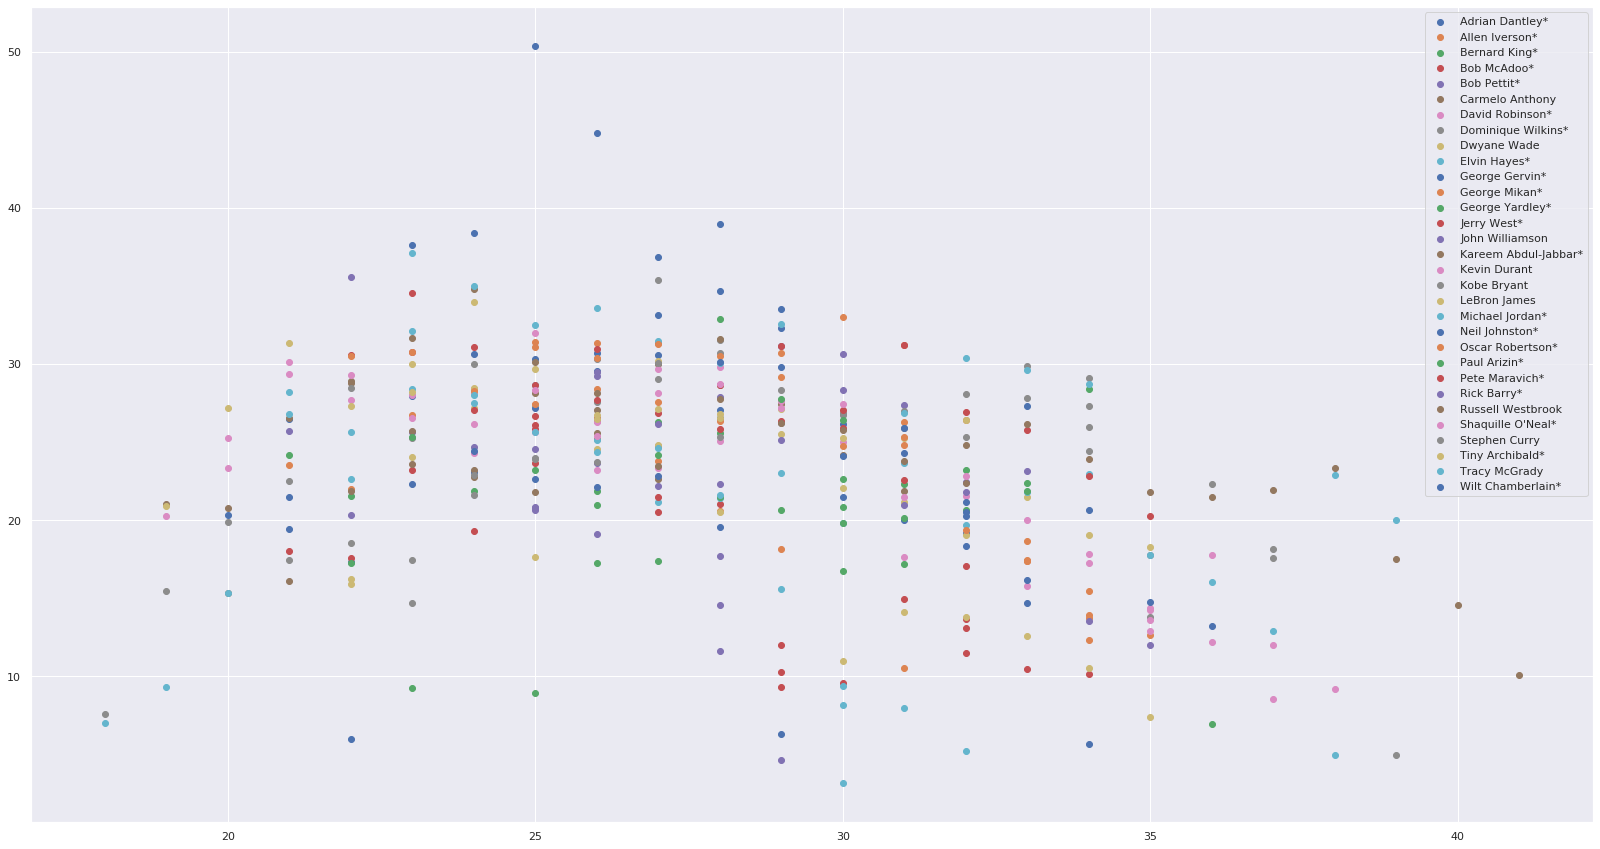

In [32]:
# Let's see how the data looks like

i = 0
fig,ax = plt.subplots(figsize=(28,15))
for name, group in top_all_time.groupby('Player'):
    ax.scatter(group['Age'], group['PPG'], label=name)
    
plt.legend()
plt.show()

In [25]:
pos_list = list(merge['Pos'].unique())
top_by_cate_dict = {'Name': [],
             'Team': [],
             'Games': [],
             'Pos': [],
            'PPG': []
            
}
  
for i in pos_list:
    a = merge[merge['Pos'] == i].max()
    top_by_cate_dict['Name'].append(a['Player'])
    top_by_cate_dict['Team'].append(a['Tm'])
    top_by_cate_dict['Games'].append(a['G'])
    top_by_cate_dict['Pos'].append(a['Pos'])
    top_by_cate_dict['PPG'].append(a['PPG'])
    
top_by_cate_dict = pd.DataFrame(top_by_cate_dict)
# merge[merge['Pos']=='C'].max()

In [26]:
top_by_cate_dict.to_csv('top all time by cate.csv')
player.sample()

name  year_start  year_end position height  weight  \
80  Dan Anderson        1975      1976        G    6-2   185.0   

         birth_date                            college  length  
80  January 1, 1951  University of Southern California       1

In [24]:
print('Min:', season['Age'].min(), 'Max:', season['Age'].max())

Min: 18.0 Max: 44.0


### Second approach:
**- In this part, my team members will dive into the change in the stratergy over time, especially the 3pt attempt.**

#### Data overview

In [25]:
# Player table

players = pd.read_csv('players.csv')

players.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [5]:
# Check data types and if any records are missing
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [6]:
players.dropna(axis = 0, subset = ['position','weight','height'], inplace = True)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 4549
Data columns (total 8 columns):
name          4544 non-null object
year_start    4544 non-null int64
year_end      4544 non-null int64
position      4544 non-null object
height        4544 non-null object
weight        4544 non-null float64
birth_date    4514 non-null object
college       4242 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 319.5+ KB


In [7]:
players['birth_date'].fillna('No record',inplace = True)
players['college'].fillna('No record',inplace = True)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 4549
Data columns (total 8 columns):
name          4544 non-null object
year_start    4544 non-null int64
year_end      4544 non-null int64
position      4544 non-null object
height        4544 non-null object
weight        4544 non-null float64
birth_date    4544 non-null object
college       4544 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 319.5+ KB


In [8]:
#Convert Height and weight to cm and kg
def height_to_cm(height):
    if height == 'None':
        return -1
    feet, inch = height.split('-')
    return int(feet) * 30.48 + int(inch) * 2.54
def weight_to_kg(weight):
    if weight == 'None':
        return -1
    else:
        return int(weight)/2.205

players['height'] = players['height'].apply(height_to_cm)
players['weight'] = players['weight'].apply(weight_to_kg)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4544 entries, 0 to 4549
Data columns (total 8 columns):
name          4544 non-null object
year_start    4544 non-null int64
year_end      4544 non-null int64
position      4544 non-null object
height        4544 non-null float64
weight        4544 non-null float64
birth_date    4544 non-null object
college       4544 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 319.5+ KB


In [26]:
# Season table 
data = pd.read_csv('seasons.csv',index_col = 0)
data.head()

Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368  ...   
1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435  ...   
2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394  ...   
3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312  ...   
4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308  ...   

     FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 52 columns]

In [10]:
#We only use data from 1980 till now since before 1977-1978 season, Players stat is not properly tracked
data = data[data['Year'] >=1980]

In [11]:
#Clean the Data
# Drop rows that have more than 10 Null value, they are players that did not get to play much and is the minority in the dataset
data.dropna(axis = 0, thresh = 10, inplace = True)
#drop column GS since we would not use it
data = data.drop('GS',axis = 1)
#Clean player's name since we will use it to merge with players table
data['Player'] = data['Player'].str.strip('*')
#Drop blank column
data = data.drop(['blanl','blank2'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 5727 to 24690
Data columns (total 49 columns):
Year      18927 non-null float64
Player    18927 non-null object
Pos       18927 non-null object
Age       18927 non-null float64
Tm        18927 non-null object
G         18927 non-null float64
MP        18927 non-null float64
PER       18922 non-null float64
TS%       18851 non-null float64
3PAr      18839 non-null float64
FTr       18839 non-null float64
ORB%      18922 non-null float64
DRB%      18922 non-null float64
TRB%      18922 non-null float64
AST%      18922 non-null float64
STL%      18922 non-null float64
BLK%      18922 non-null float64
TOV%      18866 non-null float64
USG%      18922 non-null float64
OWS       18927 non-null float64
DWS       18927 non-null float64
WS        18927 non-null float64
WS/48     18922 non-null float64
OBPM      18927 non-null float64
DBPM      18927 non-null float64
BPM       18927 non-null float64
VORP      18927 non-null float64


In [12]:
#Fix the Datatype from float to INT for some column
data_types = {'Year':int, 'Age':int,'G':int, 'MP':int,
               'FG':int, 'FGA':int,'3P':int, '3PA':int, '2P':int, '2PA':int, 'FT':int, 'FTA':int,
               'ORB':int, 'DRB':int, 'TRB':int, 'AST':int, 'STL':int, 'BLK':int, 'TOV':int, 'PF':int, 'PTS':int}
data = data.astype(data_types)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 5727 to 24690
Data columns (total 49 columns):
Year      18927 non-null int64
Player    18927 non-null object
Pos       18927 non-null object
Age       18927 non-null int64
Tm        18927 non-null object
G         18927 non-null int64
MP        18927 non-null int64
PER       18922 non-null float64
TS%       18851 non-null float64
3PAr      18839 non-null float64
FTr       18839 non-null float64
ORB%      18922 non-null float64
DRB%      18922 non-null float64
TRB%      18922 non-null float64
AST%      18922 non-null float64
STL%      18922 non-null float64
BLK%      18922 non-null float64
TOV%      18866 non-null float64
USG%      18922 non-null float64
OWS       18927 non-null float64
DWS       18927 non-null float64
WS        18927 non-null float64
WS/48     18922 non-null float64
OBPM      18927 non-null float64
DBPM      18927 non-null float64
BPM       18927 non-null float64
VORP      18927 non-null float64
FG      

In [13]:
#Fill null with -1 since the remain Null data is the result of division by Zero
data = data.fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 5727 to 24690
Data columns (total 49 columns):
Year      18927 non-null int64
Player    18927 non-null object
Pos       18927 non-null object
Age       18927 non-null int64
Tm        18927 non-null object
G         18927 non-null int64
MP        18927 non-null int64
PER       18927 non-null float64
TS%       18927 non-null float64
3PAr      18927 non-null float64
FTr       18927 non-null float64
ORB%      18927 non-null float64
DRB%      18927 non-null float64
TRB%      18927 non-null float64
AST%      18927 non-null float64
STL%      18927 non-null float64
BLK%      18927 non-null float64
TOV%      18927 non-null float64
USG%      18927 non-null float64
OWS       18927 non-null float64
DWS       18927 non-null float64
WS        18927 non-null float64
WS/48     18927 non-null float64
OBPM      18927 non-null float64
DBPM      18927 non-null float64
BPM       18927 non-null float64
VORP      18927 non-null float64
FG      

In [14]:
## Height and Weight Analysis

In [15]:
#Add column BMI into Dataframe
players['BMI'] = players['weight']/((players['height']/100)**2)
players.sample()
## Height and weight are distributed normally

name  year_start  year_end position  height  weight  \
2122  Noble Jorgensen        1947      1953        C 205.740 103.401   

        birth_date             college    BMI  
2122  May 18, 1925  University of Iowa 24.428

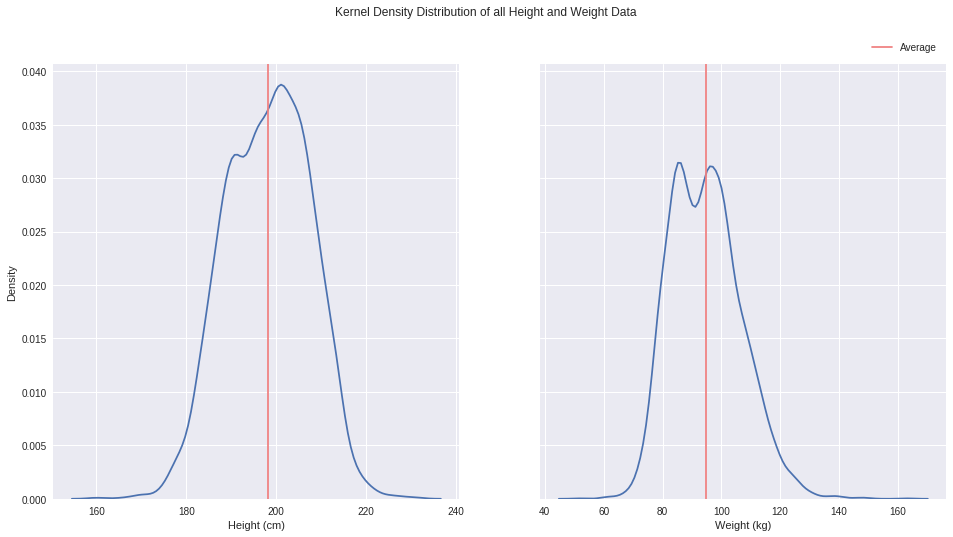

In [16]:
# Visualise distribution of height and weight data

fig, ax =plt.subplots(1,2,figsize=(16, 8),sharey=True)

sns.kdeplot(players['height'], ax=ax[0], label='_nolegend_')
sns.kdeplot(players['weight'], ax=ax[1], label='_nolegend_')
ax[0].axvline(players['height'].mean(), color='lightcoral', label='Average')
ax[1].axvline(players['weight'].mean(), color='lightcoral', label='Average')

ax[0].yaxis.set_label_text('Density')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Kernel Density Distribution of all Height and Weight Data')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.07))

plt.show()

At a glance, we can see that the height and weight of nba players is distributed normally. Most of players is within range [180,210] for Height and [80,100] for weight

#### There is an positive corelation between Height and Weight

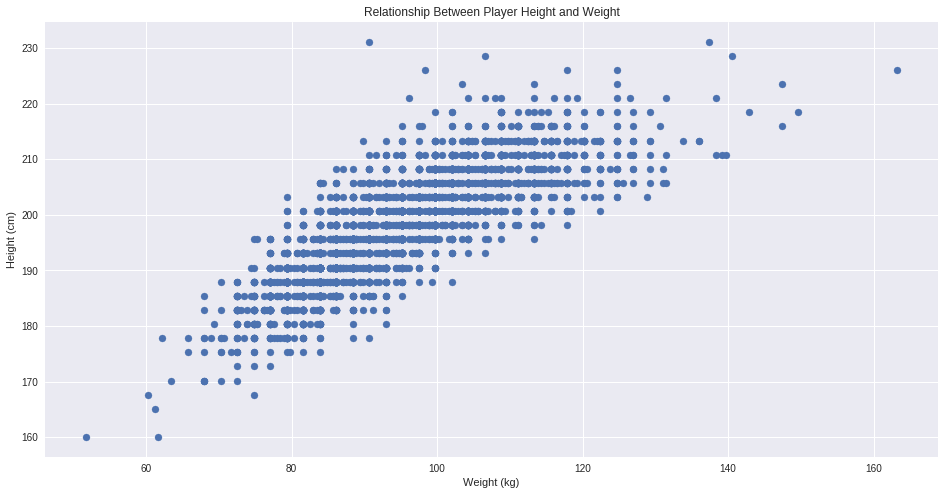

In [17]:
#Relationship between height and weight of players
plt.figure(figsize=(16, 8))

plt.scatter(x = players['weight'], y = players['height'])

plt.title('Relationship Between Player Height and Weight')
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')

plt.show()

In [18]:
#separate each season stat
season_data = {}
for year in range(1950,2018):
    play_in_year = ((players['year_end'] >= year) & (players['year_start'] <= year))
    season_data[year] = players[play_in_year]

#get the avg of each season
avg_height = {}
avg_weight = {}
avg_BMI = {}
for s in season_data:
    avg_height[s] = season_data[s].loc[:,'height'].mean()
    avg_weight[s] = season_data[s].loc[:,'weight'].mean()
    avg_BMI[s] = season_data[s].loc[:,'BMI'].mean()
avg_height = sorted(avg_height.items())
avg_weight = sorted(avg_weight.items())
avg_BMI = sorted(avg_BMI.items())

#### Height and Weight increase over time. 

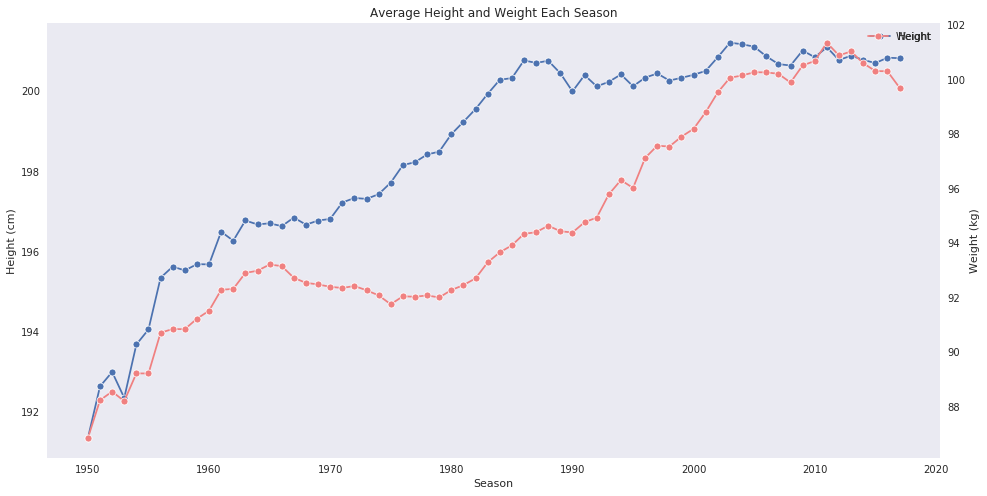

In [19]:
#Average Height and Weight by time
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

x,y = zip(*avg_height)
height = sns.lineplot(x, y, marker="o", ax=ax, ci=None, label='Height')
x,y = zip(*avg_weight)
weight = sns.lineplot(x, y, marker="o", ax=ax2, ci=None, label='Weight', color='lightcoral')


plt.title('Average Height and Weight Each Season')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

#  = height + weight
# labs = [height.get_labels(), weight.get_labels()]
# ax.legend(lns, labs, loc=0)

# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax.legend(lines + lines2, labels + labels2, loc='top left')

plt.show()
#TODO config legend


#### There are some mystery on the BMI thought.

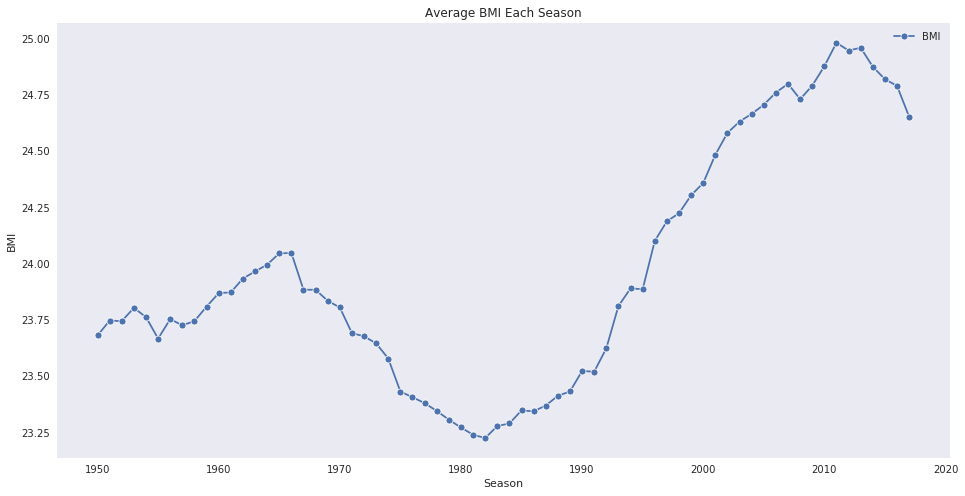

In [20]:
#BMI over time
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(16, 8))

x,y = zip(*avg_BMI)
height = sns.lineplot(x, y, marker="o", ax=ax, ci=None, label='BMI')

plt.title('Average BMI Each Season')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('BMI')

plt.show()

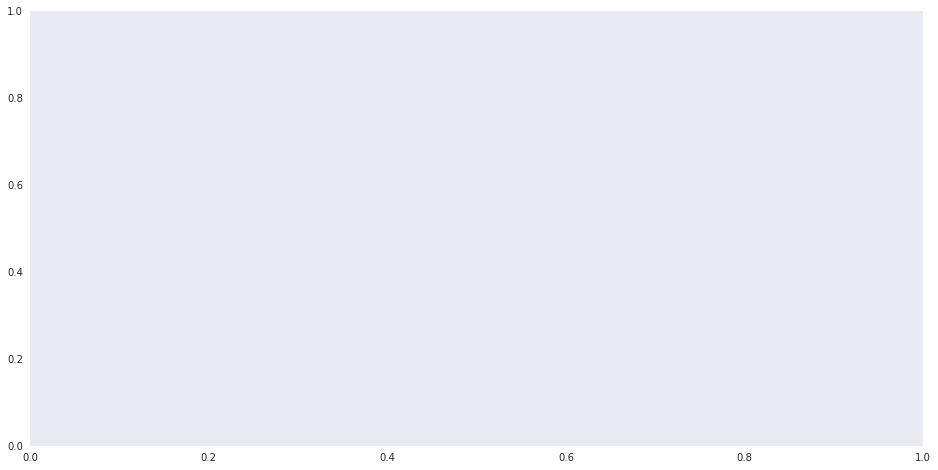

In [21]:
#Plot body index by postion, plot work but there is error in anymation.
fig, ax = plt.subplots(figsize=(16, 8))
def plot_year(year):
    ax.clear()
    ax.set_xlim([60,160])
    ax.set_ylim([160,230])
    ax.set_title(str(int(year)))
    ax.set_xlabel('Weight [kg]')
    ax.set_ylabel('Height [cm]')
    season = season_data[year]
    x = season[season['position'] == 'G'].loc[:,'weight']
    y = season[season['position'] == 'G'].loc[:,'height']
    ax.plot(x,y,'o', color = 'r', markersize = 10, alpha = 0.5)
    x = season[season['position'] == 'F'].loc[:,'weight']
    y = season[season['position'] == 'F'].loc[:,'height']
    ax.plot(x,y,'o', color = 'm', markersize = 10, alpha = 0.5)
    x = season[season['position'] == 'C'].loc[:,'weight']
    y = season[season['position'] == 'C'].loc[:,'height']
    ax.plot(x,y,'o', color = 'b', markersize = 10, alpha = 0.5)
    ax.legend(['G','F','C'], loc = 1)


#### Height and Weight Impact on Performance

In [22]:
#merge data from players and seasons
merge_data = data.merge(players, left_on = 'Player', right_on = 'name', how = 'left')
merge_data.dropna(axis = 0, inplace = True)
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19307 entries, 0 to 19462
Data columns (total 58 columns):
Year          19307 non-null int64
Player        19307 non-null object
Pos           19307 non-null object
Age           19307 non-null int64
Tm            19307 non-null object
G             19307 non-null int64
MP            19307 non-null int64
PER           19307 non-null float64
TS%           19307 non-null float64
3PAr          19307 non-null float64
FTr           19307 non-null float64
ORB%          19307 non-null float64
DRB%          19307 non-null float64
TRB%          19307 non-null float64
AST%          19307 non-null float64
STL%          19307 non-null float64
BLK%          19307 non-null float64
TOV%          19307 non-null float64
USG%          19307 non-null float64
OWS           19307 non-null float64
DWS           19307 non-null float64
WS            19307 non-null float64
WS/48         19307 non-null float64
OBPM          19307 non-null float64
DBPM          

##### Bigger = More Rebound, Smaller = More Assist

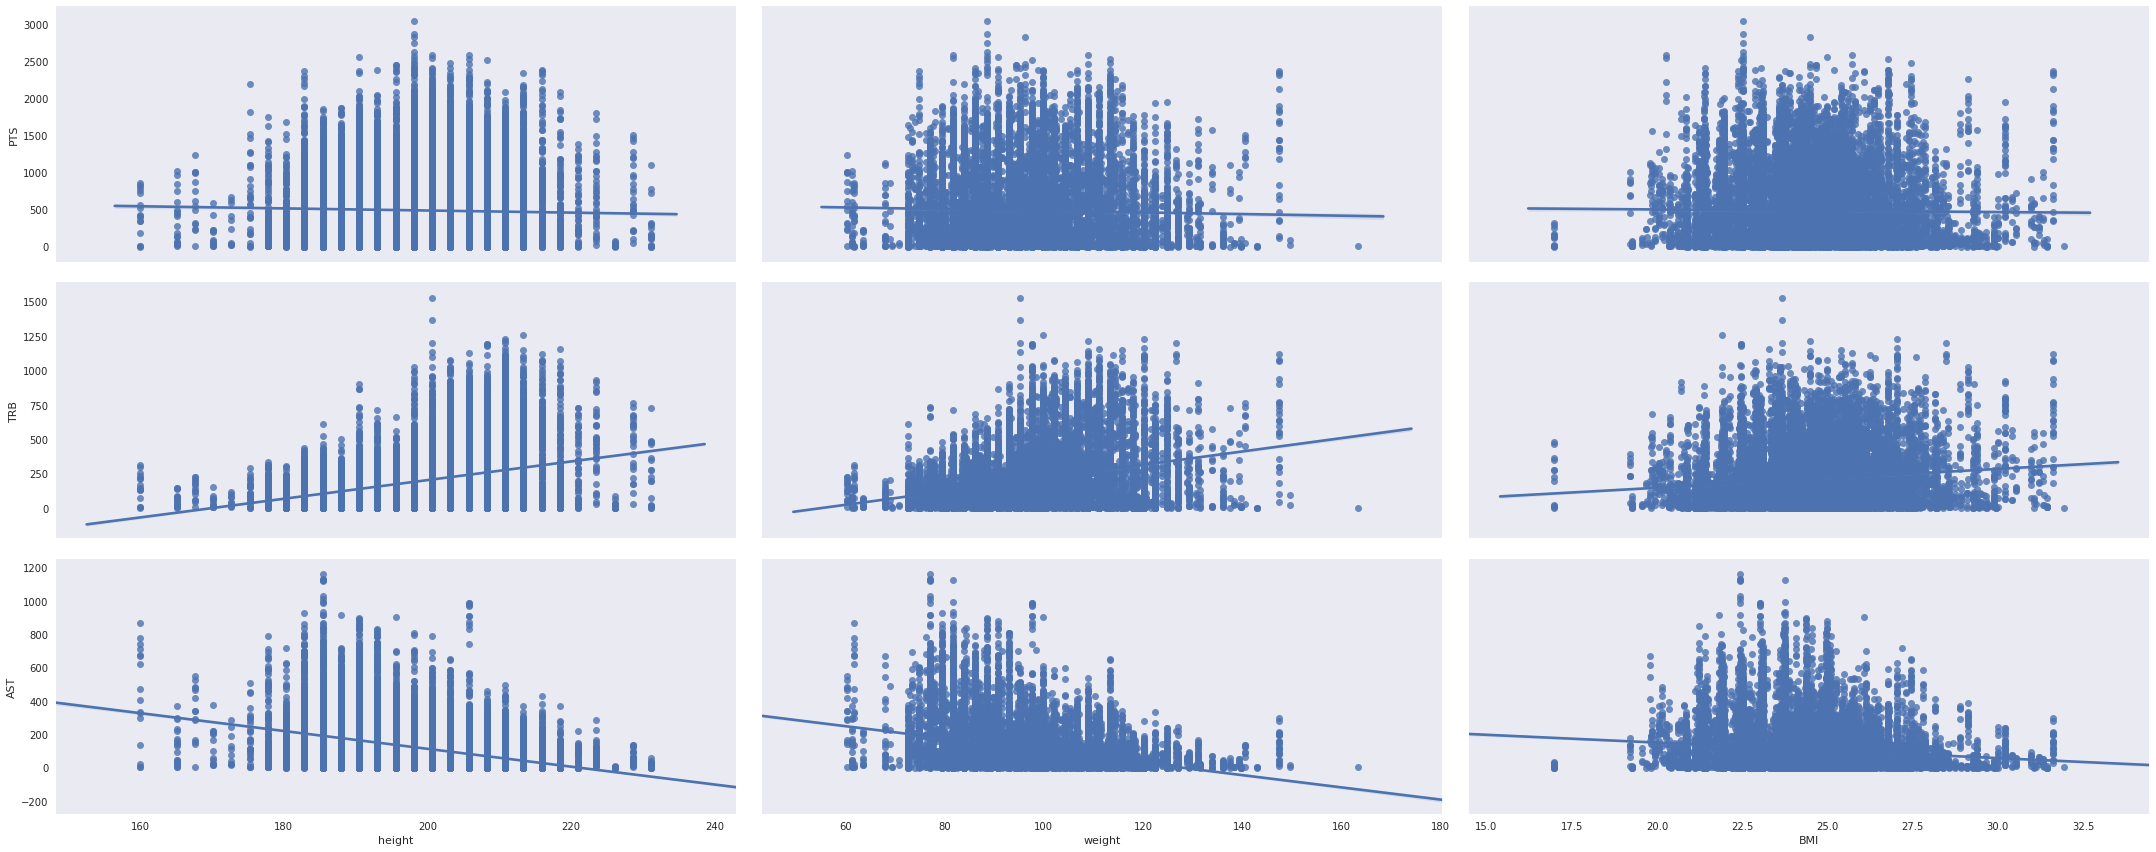

In [23]:
#Corelation between Height, Weight, BMI and performance
sns.pairplot(data=merge_data, kind='reg', 
             aspect=2.5, height=4, 
             y_vars=['PTS','TRB','AST'], 
             x_vars=['height','weight','BMI'])
plt.show()

#### How 3pt have changed in the NBA

##### Prepare the data


In [24]:
#Get the necessary stats from merge_data
total_stat_by_year = {}

raw_stat = merge_data[['Year', 'Player', 'Pos', 'Age', 'G', 'MP',
                    'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                    'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

#Drop tweener(two-way players), the number is insificant considering our dataset
positions = ('PG','SG','SF','PF','C')
tweener = raw_stat[~raw_stat['Pos'].isin(positions)]
raw_stat = raw_stat.drop( raw_stat[~raw_stat['Pos'].isin(positions)].index, axis = 0)

#Divide our stat by year
for year,data_group in raw_stat.groupby('Year'):
    total_stat_by_year[year] = data_group.drop('Year',axis = 1).groupby('Pos').sum().reset_index()

#Add necessary stats
for year in total_stat_by_year:
    stat = total_stat_by_year[year]
    stat['3PAr'] = stat['3PA']/stat['FGA'] 
    stat['FG%'] = stat['FG']/stat['FGA']
    stat['3P%'] = stat['3P']/stat['3PA']
    stat['2P%'] = stat['2P']/stat['2PA']
    stat['eFG%'] = (stat['FG'] + 0.5 * stat['3P'])/stat['FGA']
    stat['FGPG'] = stat['FG'] / stat['G']
    stat['FGAPG'] = stat['FGA'] / stat['G']
    stat['3PPG'] = stat['FG'] / stat['G']
    stat['3PAPG'] = stat['3PA'] / stat['G']
    stat['2PPG'] = stat['2P'] / stat['G']
    stat['2PAPG'] = stat['2PA'] / stat['G']
    stat['ORBPG'] = stat['ORB'] / stat['G']
    stat['DRBPG'] = stat['DRB'] / stat['G']
    stat['TRBPG'] = stat['TRB'] / stat['G']
    stat['APG'] = stat['AST'] / stat['G']
    stat['PPG'] = stat['PTS'] / stat['G']

In [25]:
#Check our data
total_stat_by_year[1998]

Pos   Age     G      MP     FG    FGA    3P    3PA     2P    2PA     FT  \
0   C  2732  4952  111378  16602  34360   128    547  16474  33813   9002   
1  PF  3526  5842  133016  19469  41207   572   1897  18897  39310  11283   
2  PG  2955  5730  137499  18633  44336  3666  10972  14967  33364   9934   
3  SF  2924  5621  140497  22424  50022  3269   9299  19155  40723  11733   
4  SG  3436  5418  130514  19908  46189  4603  12682  15305  33507   9846   

     FTA    ORB    DRB    TRB    AST   STL   BLK   TOV     PF    PTS  3PAr  \
0  13651  10302  19065  29367   5160  2799  5726  6640  13154  42334 0.016   
1  16132  10981  21371  32352   7775  3965  3345  7996  14291  50793 0.046   
2  12640   3071  10401  13472  24898  6172   768  9997  10569  50866 0.247   
3  15436   6671  14917  21588  10428  4882  2243  8394  12380  59850 0.186   
4  12366   3864  10255  14119  11739  4897  1211  7495   9876  54265 0.275   

    FG%   3P%   2P%  eFG%  FGPG  FGAPG  3PPG  3PAPG  2PPG  2PAPG  ORBPG  \
0 0.483 0.234 0.487 0.485 3.353  6.939 3.353  0.110 3.327  6.828  2.080   
1 0.472 0.302 0.481 0.479 3.333  7.054 3.333  0.325 3.235  6.729  1.880   
2 0.420 0.334 0.449 0.462 3.252  7.738 3.252  1.915 2.612  5.823  0.536   
3 0.448 0.352 0.470 0.481 3.989  8.899 3.989  1.654 3.408  7.245  1.187   
4 0.431 0.363 0.457 0.481 3.674  8.525 3.674  2.341 2.825  6.184  0.713   

   DRBPG  TRBPG   APG    PPG  
0  3.850  5.930 1.042  8.549  
1  3.658  5.538 1.331  8.694  
2  1.815  2.351 4.345  8.877  
3  2.654  3.841 1.855 10.648  
4  1.893  2.606 2.167 10.016

##### Analyse data


**1. Players are shooting more and more 3-pointer.**

Text(0, 0.5, '3PT Attemp')

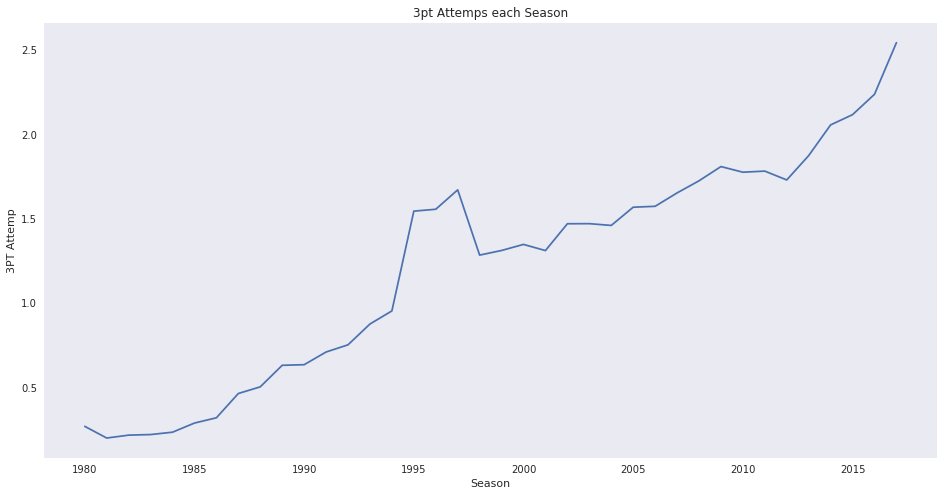

In [26]:
#3pt Attempt each seasons
fig, ax = plt.subplots(figsize=(16, 8))
_3PA = {}

for year in total_stat_by_year:
    _3PA[year] = (total_stat_by_year[year]['3PA'].sum()/total_stat_by_year[year]['G'].sum())

x = _3PA.keys()
y = _3PA.values()
sns.lineplot(list(x),list(y))

plt.title('3pt Attemps each Season')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('3PT Attemp')

**2. PF is the position that have the highest difference in 3 Pointer Attempt.**

Text(117.0, 0.5, '3PT attempt')

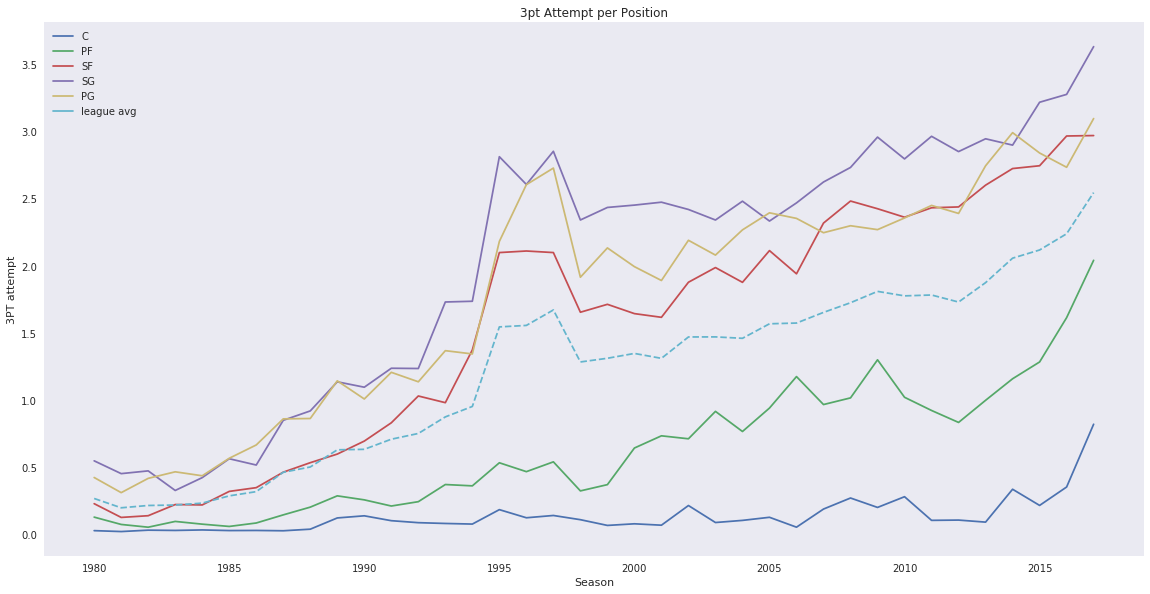

In [27]:
#3pt Attempt per position

fig, ax = plt.subplots(figsize=(16, 8))
fig.tight_layout()
position_three_rate = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
three_rate = {}
for year in total_stat_by_year:
    three_rate[year] = (total_stat_by_year[year]['3PA'].sum() /total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_three_rate[row['Pos']].append(row['3PA']/row['G'])

for keys, values in position_three_rate.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys)

    
x = three_rate.keys()
y = three_rate.values()
sns.lineplot(list(x),list(y), label = 'league avg')

ax.lines[5].set_linestyle("--")
    
plt.title('3pt Attempt per Position')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('3PT attempt')

**3. Shooting more 3 is not equal to being more efficient.**

Text(0, 0.5, 'eFG%')

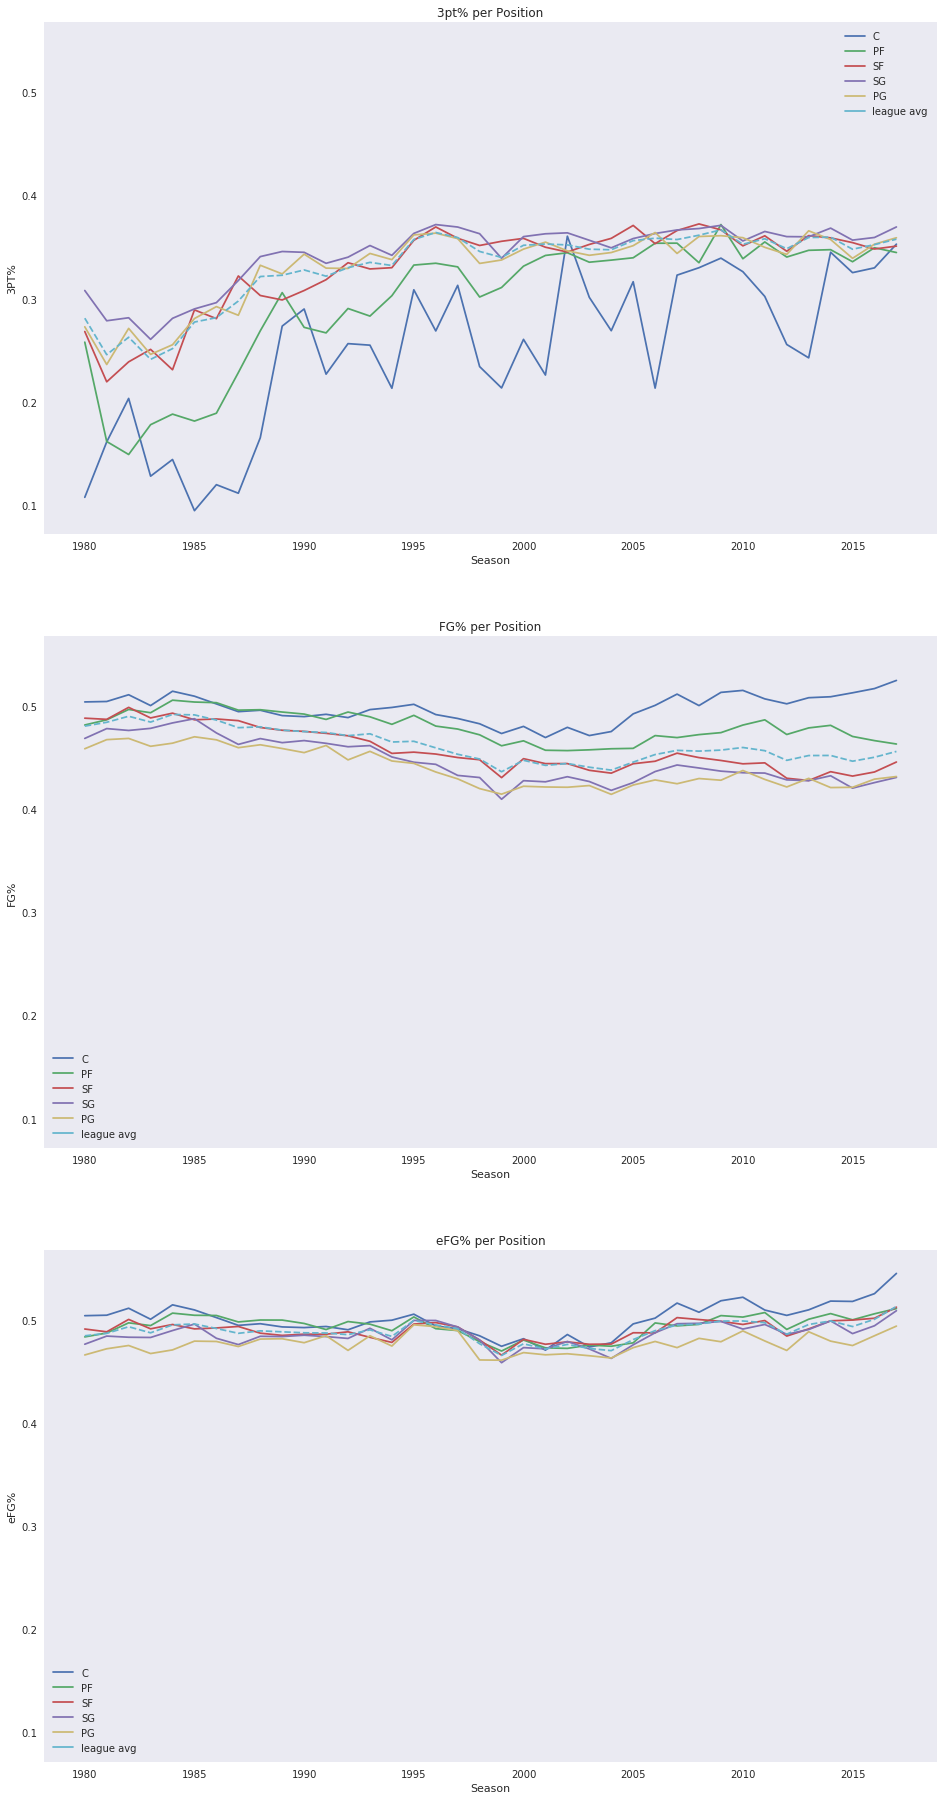

In [28]:
#Impact of the raise of 3 pointer attemps to the efficiency 
fig, axarr = plt.subplots(3, 1,figsize=(16, 32), sharey=True)

#3pt%
position_three_pct = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
three_pct = {}
for year in total_stat_by_year:
    three_pct[year] = (total_stat_by_year[year]['3P'].sum()/total_stat_by_year[year]['3PA'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_three_pct[row['Pos']].append(row['3P%'])

for keys, values in position_three_pct.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[0])

x = three_pct.keys()
y = three_pct.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[0])

axarr[0].lines[5].set_linestyle("--")
    
axarr[0].set_title('3pt% per Position')
axarr[0].xaxis.set_label_text('Season')
axarr[0].yaxis.set_label_text('3PT%')

#FG%
position_FG_pct = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
FG_pct = {}
for year in total_stat_by_year:
    FG_pct[year] = ((total_stat_by_year[year]['FG'].sum()) / total_stat_by_year[year]['FGA'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_FG_pct[row['Pos']].append(row['FG%'])

for keys, values in position_FG_pct.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[1])

x = FG_pct.keys()
y = FG_pct.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[1])
axarr[1].lines[5].set_linestyle("--")
    
axarr[1].set_title('FG% per Position')
axarr[1].xaxis.set_label_text('Season')
axarr[1].yaxis.set_label_text('FG%')

#%eFG
position_eFG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
eFG = {}
for year in total_stat_by_year:
    eFG[year] = ((total_stat_by_year[year]['FG'].sum() + 0.5 * total_stat_by_year[year]['3P'].sum()) / total_stat_by_year[year]['FGA'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_eFG[row['Pos']].append(row['eFG%'])

for keys, values in position_eFG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[2])

x = eFG.keys()
y = eFG.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[2])
axarr[2].lines[5].set_linestyle("--")
    
axarr[2].set_title('eFG% per Position')
axarr[2].xaxis.set_label_text('Season')
axarr[2].yaxis.set_label_text('eFG%')

**4. Rebounding-wise,  Only PF get affected by the trend**

Text(0, 0.5, 'Total Rebound')

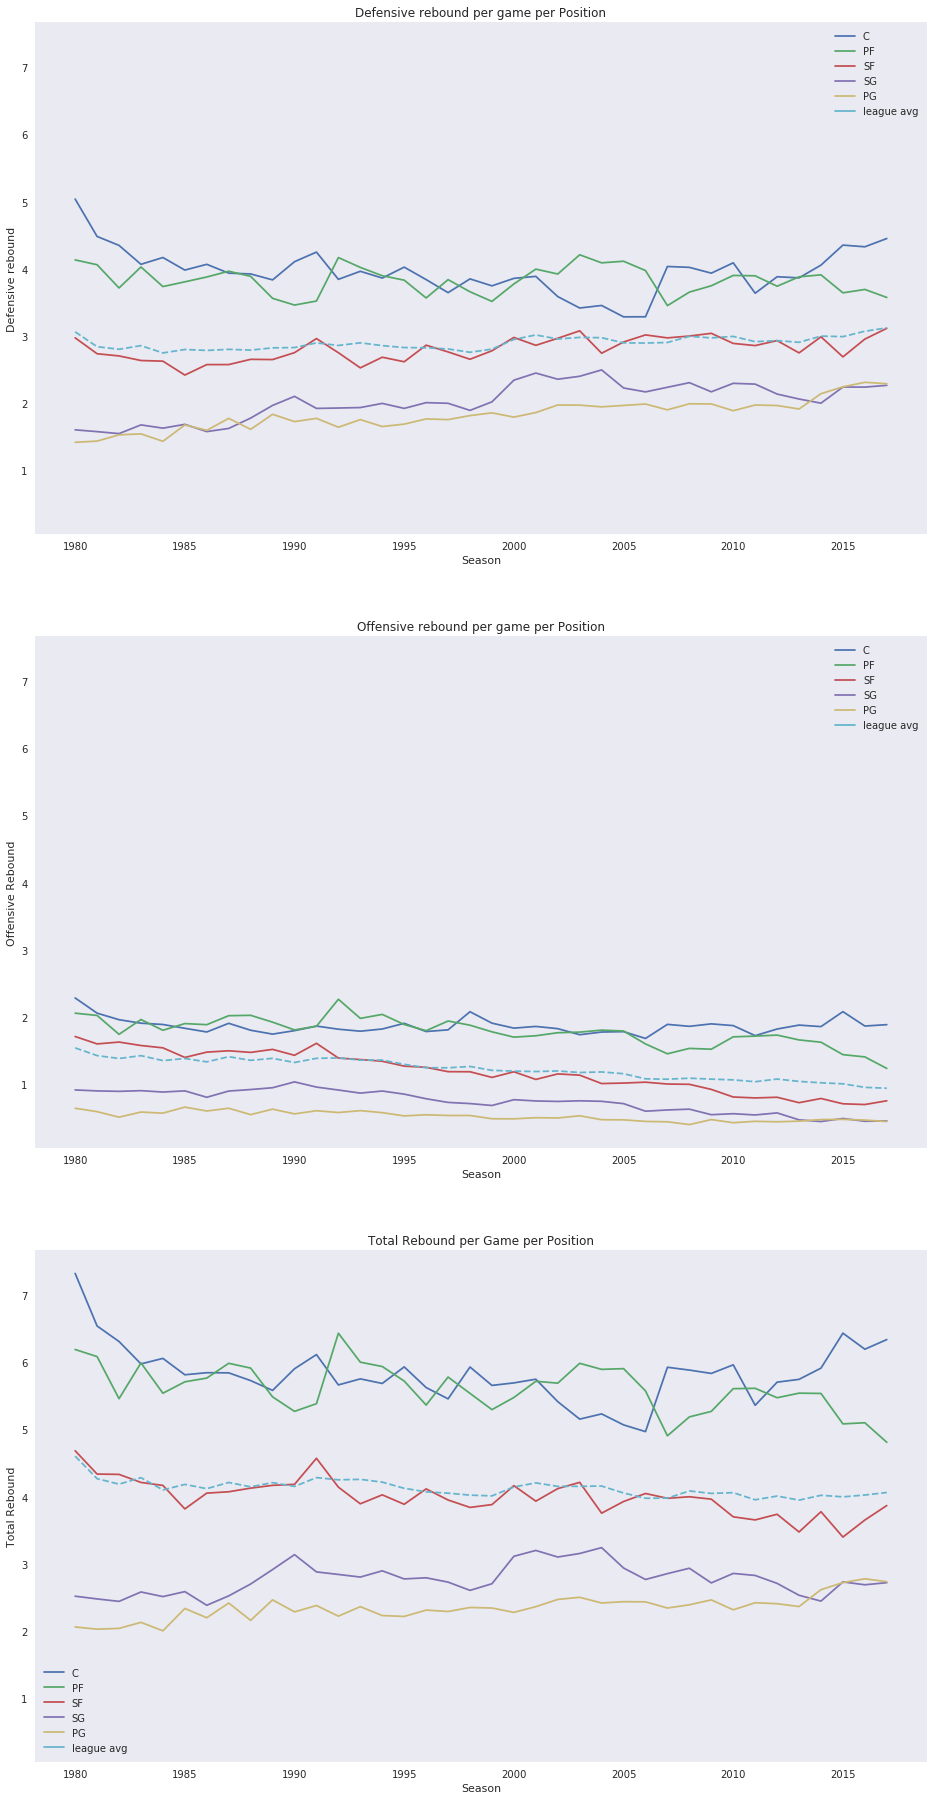

In [29]:
#Impact of the raise of 3 pointer attemps to the Rebounding stats 
fig, axarr = plt.subplots(3, 1,figsize=(16, 32), sharey=True)

#Defensive rebound per game
position_DRBPG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
DRBPG = {}
for year in total_stat_by_year:
    DRBPG[year] = (total_stat_by_year[year]['DRB'].sum()/total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_DRBPG[row['Pos']].append(row['DRBPG'])

for keys, values in position_DRBPG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[0])

x = DRBPG.keys()
y = DRBPG.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[0])

axarr[0].lines[5].set_linestyle("--")
    
axarr[0].set_title('Defensive rebound per game per Position')
axarr[0].xaxis.set_label_text('Season')
axarr[0].yaxis.set_label_text('Defensive rebound')

#Offensive rebound per  game
position_ORBPG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
ORBPG = {}
for year in total_stat_by_year:
    ORBPG[year] = ((total_stat_by_year[year]['ORB'].sum()) / total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_ORBPG[row['Pos']].append(row['ORBPG'])

for keys, values in position_ORBPG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[1])

x = ORBPG.keys()
y = ORBPG.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[1])
axarr[1].lines[5].set_linestyle("--")
    
axarr[1].set_title('Offensive rebound per game per Position')
axarr[1].xaxis.set_label_text('Season')
axarr[1].yaxis.set_label_text('Offensive Rebound')

#Total Rebound
position_TRBPG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
TRBPG = {}
for year in total_stat_by_year:
    TRBPG[year] = ((total_stat_by_year[year]['TRB'].sum()) / total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_TRBPG[row['Pos']].append(row['TRBPG'])

for keys, values in position_TRBPG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys, ax = axarr[2])

x = TRBPG.keys()
y = TRBPG.values()
sns.lineplot(list(x),list(y), label = 'league avg', ax = axarr[2])
axarr[2].lines[5].set_linestyle("--")
    
axarr[2].set_title('Total Rebound per Game per Position')
axarr[2].xaxis.set_label_text('Season')
axarr[2].yaxis.set_label_text('Total Rebound')

**5. There are no effect on Assist whatsoever**

Text(117.0, 0.5, 'Assist per Game')

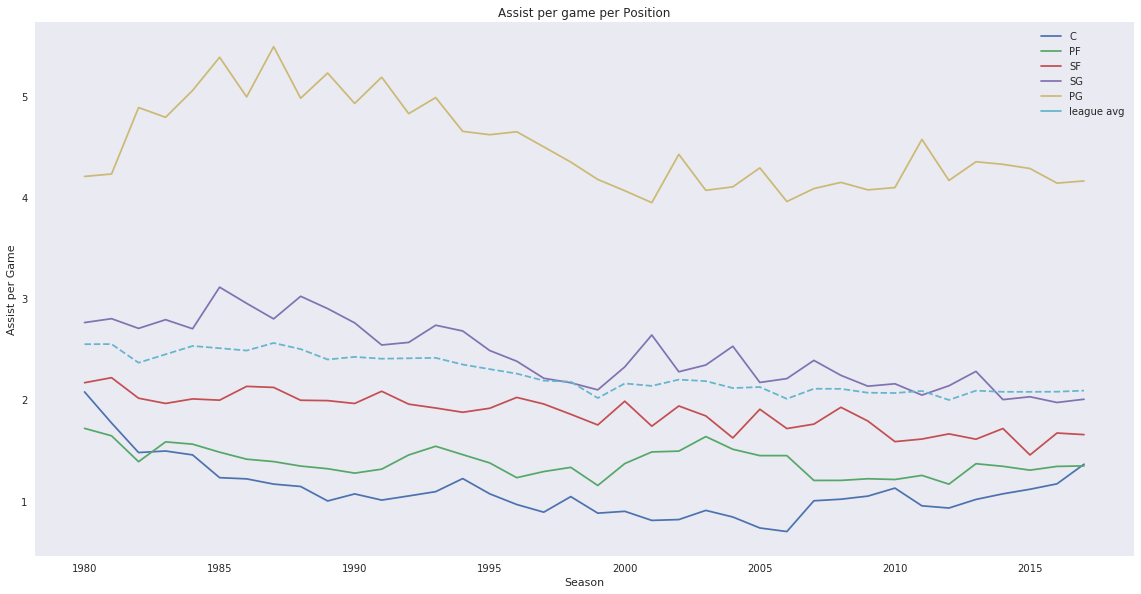

In [30]:
#Assist Per Game
fig, ax = plt.subplots(figsize=(16, 8))
fig.tight_layout()
position_APG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
APG = {}
for year in total_stat_by_year:
    APG[year] = ((total_stat_by_year[year]['AST'].sum()) / total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_APG[row['Pos']].append(row['APG'])

for keys, values in position_APG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys)

x = APG.keys()
y = APG.values()
sns.lineplot(list(x),list(y), label = 'league avg')
ax.lines[5].set_linestyle("--")
    
plt.title('Assist per game per Position')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Assist per Game')

**6. Points per game stay the same too.**


Text(117.0, 0.5, 'Point per Game')

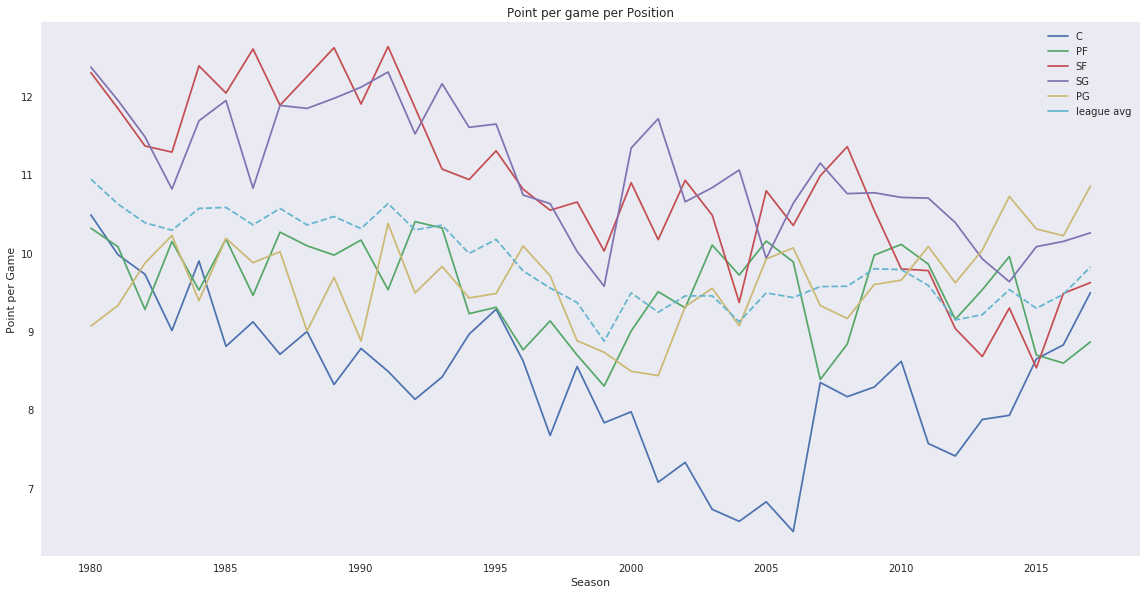

In [31]:
#Points per game
fig, ax = plt.subplots(figsize=(16, 8))
fig.tight_layout()
position_PPG = {'C':[],'PF':[],'SF':[],'SG':[],'PG':[]}
PPG = {}
for year in total_stat_by_year:
    PPG[year] = ((total_stat_by_year[year]['PTS'].sum()) / total_stat_by_year[year]['G'].sum())
    for index, row in total_stat_by_year[year].iterrows():
        position_PPG[row['Pos']].append(row['PPG'])

for keys, values in position_PPG.items():
    sns.lineplot(x = np.arange(1980,2018,1),y = values, label = keys)

x = PPG.keys()
y = PPG.values()
sns.lineplot(list(x),list(y), label = 'league avg')
ax.lines[5].set_linestyle("--")
    
plt.title('Point per game per Position')
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Point per Game')

## CONCLUSION

**There are main insights that we would like to highlight in our dataset:**
1. **The number of players** has increased significantly while the number of team is not increased that much ==> each NBA teams has more no of players, however the number of official players in each game maintain the same ==> it's more and more competitive to have an official slot in an NBA games since more and more talents want to join this industry.


2. **Avg career length** is 7 years and almost 50% could not pass the first 3 years, however we can see many outliers example in this industry with one stayed in NBA for 22 years.


3. **Top players** have the tendency to be on top for more than 2 times, with the record of Micheal Jordan being the most effective player in term of scoring for 10 seasons.


4. **Top players age** in range 20-30, most be on top not long after their first NBA season.


5. At a glance, we can see that the **height and weight** of nba players is distributed normally. Most of players is within range [180,210] for Height and [80,100] for weight.


6. In term of strategy, players are shooting more and more **3-pointer**. However, shooting more doesn't mean players get more effecience at this.

## THANK FOR WATCHING
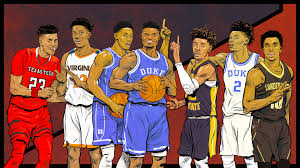